In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score

In [120]:
#Importing Data
boombikes = pd.read_csv("D:\\Satya Personal\\Upgrade\\Linear Regression\\Case Study\\day.csv")

In [121]:
boombikes.shape

(730, 16)

In [122]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [123]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [124]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# EDA

In [125]:
# Removing Instant, dteday as they are not relevant to the count (cnt)
# Also removing casual and registered as they can not be predicted.

boombikes = boombikes.drop("instant",axis=1)
boombikes = boombikes.drop("dteday",axis=1)
boombikes = boombikes.drop("casual",axis=1)
boombikes = boombikes.drop("registered",axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


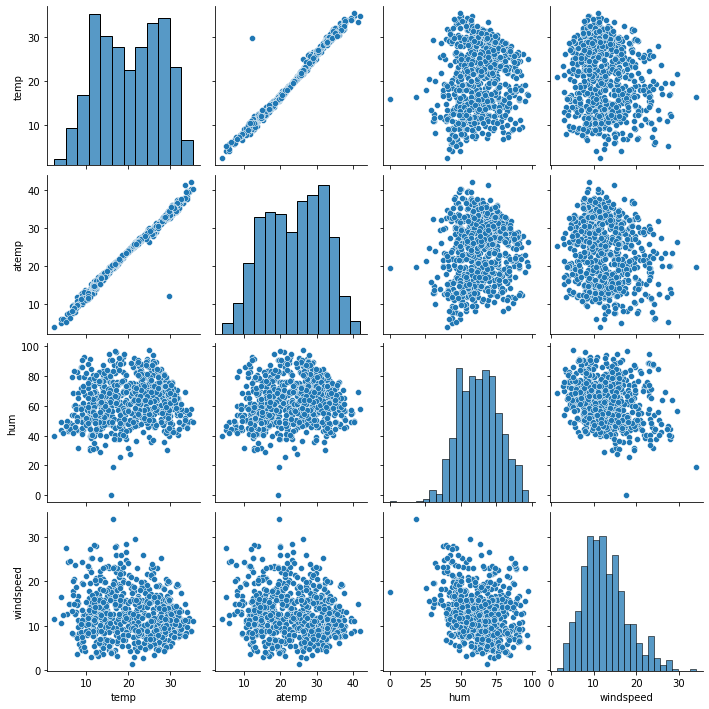

In [126]:
# Visualize the numerical varaibles
num_var = ["temp","atemp","hum","windspeed"]
sns.pairplot(boombikes[num_var])
plt.show()

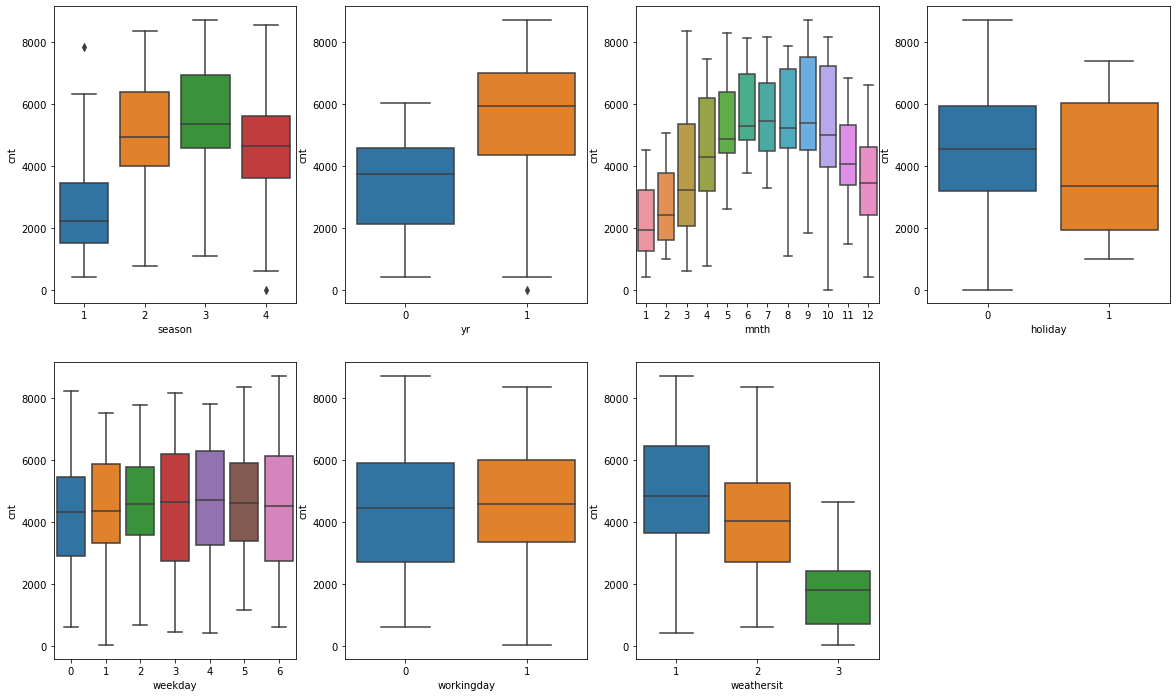

In [127]:
# Visualize the categorical varaibles
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x= "season", y = "cnt", data = boombikes)
plt.subplot(2,4,2)
sns.boxplot(x= "yr", y = "cnt", data = boombikes)
plt.subplot(2,4,3)
sns.boxplot(x= "mnth", y = "cnt", data = boombikes)
plt.subplot(2,4,4)
sns.boxplot(x= "holiday", y = "cnt", data = boombikes)
plt.subplot(2,4,5)
sns.boxplot(x= "weekday", y = "cnt", data = boombikes)
plt.subplot(2,4,6)
sns.boxplot(x= "workingday", y = "cnt", data = boombikes)
plt.subplot(2,4,7)
sns.boxplot(x= "weathersit", y = "cnt", data = boombikes)
plt.show()

# Data Preparation

In [128]:
#Creating dummy variables for categorical variables
status =pd.get_dummies(boombikes['season'])
status.rename(columns={1: "spring",2:"summer",3:"fall",4:"winter"}, inplace=True)
status

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
725,1,0,0,0
726,1,0,0,0
727,1,0,0,0
728,1,0,0,0


In [129]:
boombikes = pd.concat([boombikes,status],axis=1)
boombikes = boombikes.drop("season",axis=1)
boombikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0


In [130]:
#Creating dummy variables for categorical variables
status1 =pd.get_dummies(boombikes['mnth'])
status1.rename(columns={1: "jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"}, inplace=True)
status1

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,0,1


In [131]:

boombikes = pd.concat([boombikes,status1],axis=1)
boombikes = boombikes.drop("mnth",axis=1)
boombikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [132]:
#Creating dummy variables for categorical variables
status2 =pd.get_dummies(boombikes['weekday'])
status2.rename(columns={0: "sun",1:"mon",2:"tue",3:"wed",4:"thu",5:"fri",6:"sat"}, inplace=True)
status2

,sun,mon,tue,wed,thu,fri,sat
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
725,0,0,0,0,1,0,0
726,0,0,0,0,0,1,0
727,0,0,0,0,0,0,1
728,1,0,0,0,0,0,0


In [133]:

boombikes = pd.concat([boombikes,status2],axis=1)
boombikes = boombikes.drop("weekday",axis=1)
boombikes.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,0,0


In [134]:
#Creating dummy variables for categorical variables
status3 =pd.get_dummies(boombikes['weathersit'])
status3.rename(columns={1: "clear",2:"mist",3:"snow",4: "rain"}, inplace=True)
status3

,clear,mist,snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [135]:
boombikes = pd.concat([boombikes,status3],axis=1)
boombikes = boombikes.drop("weathersit",axis=1)
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sun,mon,tue,wed,thu,fri,sat,clear,mist,snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,1,0,0


In [136]:
#Scalling numerical data
scaler = MinMaxScaler()
num_vars = ["temp","atemp","hum","windspeed","cnt"]
boombikes[num_vars] = scaler.fit_transform(boombikes[num_vars])
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sun,mon,tue,wed,thu,fri,sat,clear,mist,snow
0,0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,...,0,0,0,1,0,0,0,1,0,0


# Splitting the data

In [137]:
boombikes_train, boombikes_test = train_test_split(boombikes, train_size=0.7, random_state=100)
print(boombikes_test.shape)
print(boombikes_train.shape)

(220, 34)
(510, 34)


# Heat Map

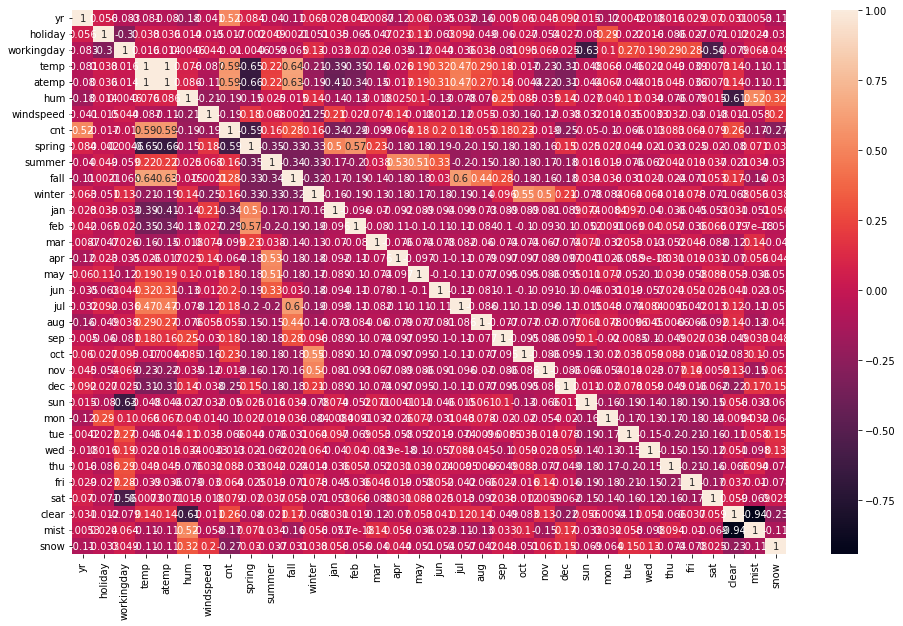

In [138]:
plt.figure(figsize=(16,10))
sns.heatmap(boombikes_test.corr(), annot = True)
plt.show()

# RFE

In [139]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [140]:
y_train = boombikes_train.pop("cnt")
X_train = boombikes_train

In [141]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [142]:
list(zip (X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('fall', True, 1),
 ('winter', False, 3),
 ('jan', False, 7),
 ('feb', False, 10),
 ('mar', False, 21),
 ('apr', False, 22),
 ('may', False, 12),
 ('jun', False, 20),
 ('jul', False, 2),
 ('aug', False, 14),
 ('sep', True, 1),
 ('oct', False, 19),
 ('nov', False, 8),
 ('dec', False, 9),
 ('sun', False, 15),
 ('mon', False, 16),
 ('tue', False, 17),
 ('wed', False, 24),
 ('thu', False, 23),
 ('fri', False, 18),
 ('sat', False, 5),
 ('clear', True, 1),
 ('mist', False, 4),
 ('snow', True, 1)]

In [143]:
import statsmodels.api as sm

In [145]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'fall', 'sep',
       'clear', 'snow'],
      dtype='object')

In [146]:
X_train_rfe = X_train[col]

In [147]:
X_train_rfe =sm.add_constant(X_train_rfe)

In [148]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [149]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          2.35e-188
Time:                        15:23:57   Log-Likelihood:                 499.08
No. Observations:                 510   AIC:                            -976.2
Df Residuals:                     499   BIC:                            -929.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3259      0.035      9.333      0.000       0.257       0.395
yr             0.2312      0.008     27.963      0.000       0.215       0.247
holiday       -0.0907      0.026     -3.489      0.001      -0.142      -0.040
temp           0.4719      0.031     15.094      0.000       0.411       0.533
hum           -0.1465      0.038     -3.856      0.000      -0.221      -0.072
windspeed     -0.1968      0.027     -7.229      0.000      -0.250      -0.143
spring        -0.1418      0.012    -11.551      0.000      -0.166      -0.118
fall          -0.0795      0.014     -5.698      0.000      -0.107      -0.052
sep            0.1004      0.016      6.164      0.000       0.068       0.132
clear          0.0563      0.011      5.307      0.000       0.035       0.077
snow          -0.1818      0.025     -7.161      0.000      -0.232      -0.132
==============================================================================
Omnibus:                       56.041   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.329
Skew:                          -0.627   Prob(JB):                     5.49e-26
Kurtosis:                       4.976   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Feature,VIF
0,const,73.57
3,temp,3.00
7,fall,2.27
4,hum,1.84
6,spring,1.67
9,clear,1.59
5,windspeed,1.18
8,sep,1.18
10,snow,1.11
1,yr,1.03


# Residual Analysis 

In [153]:
y_train_pred = lm.predict(X_train_rfe)

<AxesSubplot:ylabel='Density'>

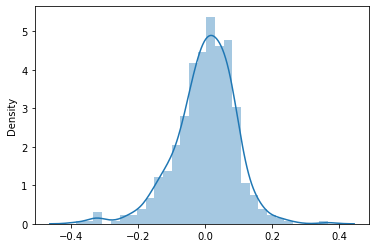

In [154]:
res = y_train-y_train_pred
sns.distplot(res)

In [156]:
y_test = boombikes_test.pop('cnt')
X_test = boombikes_test

In [157]:
X_test_new = X_test.drop(["workingday","atemp","summer","winter","jan","feb","mar","apr","may","jun","jul","aug","oct","nov","dec","sun","mon","tue","wed","thu","fri","sat","mist"],axis=1)

In [158]:
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,yr,holiday,temp,hum,windspeed,spring,fall,sep,clear,snow
184,1.0,0,1,0.831783,0.655956,0.121812,0,1,0,0,0
535,1.0,1,0,0.901354,0.608826,0.188468,0,0,0,1,0
299,1.0,0,0,0.511964,0.835904,0.361537,0,0,0,0,0
221,1.0,0,0,0.881625,0.436161,0.366681,0,1,0,1,0
152,1.0,0,0,0.817246,0.313625,0.556403,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.754499,0.312814,0,0,0,1,0
127,1.0,0,0,0.584649,0.649529,0.107707,0,0,0,1,0
640,1.0,1,0,0.745598,0.816195,0.091026,0,0,0,0,0
72,1.0,0,0,0.331557,0.511010,0.236118,1,0,0,1,0


In [161]:
y_pred = lm.predict(X_test_new)

In [160]:
r2_score(y_true=y_test,y_pred=y_pred)

0.8091483843045847